### **Librerías Principales para el Funcionamiento del Algoritmo**

In [ ]:
pip install yfinance

In [ ]:
pip install yahoo-finance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 5.3 MB/s eta 0:00:00
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7216 sha256=8894be1a9894fd5788042ea3489b505b50293be8bc6e2489444214ba2c42da9a
  Stored in directory: /root/.cache/pip/wheels/f6/a9/34/f1aaa343d0861148f79a9df08f380e4dbbdbe27b7ba1e0e84c
Successfully built yahoo-finance


In [ ]:
pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.15-py3-none-any.whl size=28713 sha256=7de25977a8036da633b5d67d3c8173663eb283c0d837cf2eca3492a00405777e
  Stored in directory: /root/.cache/pip/wheels/06/9c/4b/0566bbb720cdf54370f921f20d259a26392099760a37827811
Successfully built yahoofinancials


In [ ]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Descargar datos de yahoo
import yfinance as yf
from yahoofinancials import YahooFinancials

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

### **Extracción de los Datos Históricos del Activo de Renta Variable de su Preferencia**


In [ ]:
#Se pide el token del activo de renta variable
while True:
    try:
        nombre_token = input("Ingrese el valor del token: ")
        token = yf.Ticker(nombre_token)
        #Extrae el nombre del token elegido y se muestra para validar que no se haya equivocado
        token.info["longName"]
        break
    except:
        #Si el valor del token no es válido, te vuelve a pedir un valor hasta que sea válido
        print("El token no es válido, ingrese de nuevo un token que se encuentre en Yahoo Finance...\n")

Ingrese el valor del token: ^DJI


In [ ]:
#Dependiendo del token que se ha escogido, se extrae de la base de datos de Yahoo Finance los datos históricos de dicho token
df = yf.download(nombre_token,
                      #El periodo viene a ser "max" para que se extraigan los precios desde el inicio de la apertura del activo de renta variable
                      period = "max",
                      progress = False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,3172.399902,23550000
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000
...,...,...,...,...,...,...
2023-06-27,33739.031250,33975.648438,33730.390625,33926.738281,33926.738281,293210000
2023-06-28,33881.378906,33903.761719,33755.921875,33852.660156,33852.660156,268050000
2023-06-29,33854.570312,34147.679688,33828.628906,34122.421875,34122.421875,279940000


### **Tratamiento de los Datos Históricos**

In [ ]:
#Eliminamos los datos que no vamos a usar en el análisis de nuestro algoritmo y renombramos la variable "Close"
df["Precio Real"] = df["Close"]
df = df.drop(["Open"], axis=1)
df = df.drop(["High"], axis=1)
df = df.drop(["Low"], axis=1)
df = df.drop(["Adj Close"], axis=1)
df = df.drop(["Volume"], axis=1)
df = df.drop(["Close"], axis=1)
df

,Precio Real
Date,
1992-01-02,3172.399902
1992-01-03,3201.500000
1992-01-06,3200.100098
1992-01-07,3204.800049
1992-01-08,3203.899902
...,...
2023-06-27,33926.738281
2023-06-28,33852.660156
2023-06-29,34122.421875


In [ ]:
#En este punto, rellenamos los valores faLtantes que hay en el histórico del activo por temas de que esos días en activo no tuvo ninguna operación
#Le decimos que se tiene una frecuencia diaria y que los valores que son vacíos se rellenen con el día anterior de un valor vacío, dando a entender que el precio no se movió
df = df.asfreq(freq = "D", method = "ffill")
df

,Precio Real
Date,
1992-01-02,3172.399902
1992-01-03,3201.500000
1992-01-04,3201.500000
1992-01-05,3201.500000
1992-01-06,3200.100098
...,...
2023-06-29,34122.421875
2023-06-30,34407.601562
2023-07-01,34407.601562


In [ ]:
#Se grafica los precios del activo seleccionado con sus respectivas fechas, a lo largo de su apertura
titulo = "Gráfico de precios del " + token.info["longName"] + " a lo largo de su apertura"
fig = px.line(df, x = df.index, y = df["Precio Real"], template = "plotly_dark", title = titulo)
fig.show()

### **Entrenamiento de los Datos Históricos**

In [ ]:
#En esta parte, definimos los datos de entrenamiento y los datos de testeo (80% para el entrenamiento y 20% para el testeo)
train_data = df[:round(len(df) * 0.8)]
test_data = df[round(len(df) * 0.8):]
#En esta parte mostramos el total de datos que tiene cada variable y el total de datos que hay en total
train_data.shape, test_data.shape, df.shape

((9205, 1), (2301, 1), (11506, 1))

In [ ]:
#Utilizamos la librería del skLearn para poder escalar los valores de entrenamiento y testeo
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Normalizamos los valores de entrenamiento y testeo para que el entrenamiento de éste sea óptimo
scaler.fit(train_data)
train_data_escalado = scaler.transform(train_data)
test_data_escalado = scaler.transform(test_data)
test_data_escalado

array([[0.98993267],
       [0.98882406],
       [0.98882406],
       ...,
       [1.73931182],
       [1.73931182],
       [1.73991626]])

In [ ]:
#Realizamos una agrupación de bloques para el lado del entrenamiento, quiere decir que se agrupará de time_step en time_step para que el siguiente dato sea la predicción
#Se tomará un dato del entrenamiento y su siguiente valor será una "Predicción"
time_step = 1
X_train = []
Y_train = []
#total es el total de datos de entrenamiento
total = len(train_data_escalado)

for i in range(time_step, total):
    # X: Bloques agrupados en time_step
    X_train.append(train_data_escalado[i - time_step:i, 0])
    # Y: el siguiente dato
    Y_train.append(train_data_escalado[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
#En la matriz del X_train agruparemos los datos que se entrenan con la "predicción" del siguiente precio usando reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#En esta parte, gracias a la librería keras, armamos la cantidad de neuronas que tendrá nuestro modelo, qué activación tendrá y cuántos valores mostrará
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#lo que estamos diciendo acá es que el modelo será secuencial, tendrá 365 neuronas en el hiperparámetro "units" en la capa de entrada,
#que tendrá una activación "relu" que es la más conocida y usada y que tendrá una neurona de capa de salida
#Se le coloca 365 neuronas por la cantidad de días que tiene un año y que tenga mejor rendimiento
modelo_LSTM = Sequential()
modelo_LSTM.add(LSTM(units = 365, activation = "relu", input_shape = (X_train.shape[1], 1)))
modelo_LSTM.add(Dense(1))
#El optimizador será el modelo de "adam" que es mejor que el "rmsprop" y las pérdidas serán en base al "error cuadrático medio (MSE)"
#que es el más usado en los datos supervisados clasificados
modelo_LSTM.compile(optimizer = "adam", loss = "mse")

modelo_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365)               535820    
                                                                 
 dense (Dense)               (None, 1)                 366       
                                                                 
Total params: 536,186
Trainable params: 536,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#En la parte de entrenamiento del algoritmo, colocamos los valores separados y ponemos el dato principal para el rendimiento que es el batch_size
#Le colocamos que hará 100 iteraciones de entrenamiento en el hiperparámetro epochs, y el bacth_size es el número de muestras por actualización de degradado
#Una explicación sencilla de este hiperparámetro es que si no lo colocamos, predeterminadamente valdrá uno y analizará todos los datos totales del entrenamiento
#Esto produciría mucho ruido al momento del entrenamiento del modelo y que se demore mucho para entrenar
#En cambio, si colocamos el valor total de los datos del entrenamiento, no produciría ruido, pero a la vez se atascará el entrenamiento
#Entonces le ponemos un valor predeterminado o general para que el entrenamiento del modelo sea óptimo, que es 32
modelo_LSTM.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
288/288 [==============================] - 11s 21ms/step - loss: 0.0289
Epoch 2/100
288/288 [==============================] - 3s 12ms/step - loss: 2.8457e-04
Epoch 3/100
288/288 [==============================] - 4s 15ms/step - loss: 1.4011e-04
Epoch 4/100
288/288 [==============================] - 3s 11ms/step - loss: 1.1501e-04
Epoch 5/100
288/288 [==============================] - 3s 12ms/step - loss: 9.0891e-05
Epoch 6/100
288/288 [==============================] - 4s 15ms/step - loss: 6.8924e-05
Epoch 7/100
288/288 [==============================] - 4s 12ms/step - loss: 5.1822e-05
Epoch 8/100
288/288 [==============================] - 3s 12ms/step - loss: 3.9910e-05
Epoch 9/100
288/288 [==============================] - 3s 12ms/step - loss: 3.2703e-05
Epoch 10/100
288/288 [==============================] - 4s 15ms/step - loss: 3.0284e-05
Epoch 11/100
288/288 [==============================] - 3s 12ms/step - loss: 2.8113e-05
Epoch 12/100
288/288 [======================

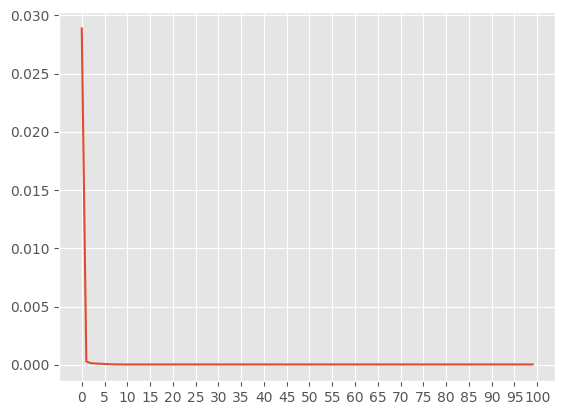

In [ ]:
#Mostramos los errores del entrenamiento del modelo LSTM, se coloca el inicio en 0, el final en 101 y que vaya en un rango de  5 en 5
perdida_LSTM = modelo_LSTM.history.history['loss']
plt.xticks(np.arange(start = 0, stop = 101, step = 5))
plt.plot(range(len(perdida_LSTM)),perdida_LSTM);

### **Predicción de los Precios Futuros del Activo Seleccionado**

In [ ]:
#Agrupamos los datos de testeo como se hizo en los datos de entrenamiemto en base al valor del "time_step"
X_test = []
for i in range(time_step, len(test_data_escalado) + 1):
    X_test.append(test_data_escalado[i - time_step:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Predecimos los valores agrupados del testeo para que nos muestre el "siguiente valor"
prediccion = modelo_LSTM.predict(X_test)
#E invertimos la normalización o escalado para poder ver el futuro precio
prediccion = scaler.inverse_transform(prediccion)

72/72 [==============================] - 0s 3ms/step


In [ ]:
#Predecimos los valores agrupados del testeo para que nos muestre el "siguiente valor"
#prediccion2 = modelo_LSTM.predict(X_test)
#Agrupamos los time_step primeros valores que no serán predecidos para la graficación
#prediccion = []
#for i in range (time_step):
#    prediccion.append(test_data_escalado[i, 0])
#for i in range (len(prediccion2)):
#    prediccion.append(prediccion2[i, 0])
#prediccion = np.array(prediccion)
#prediccion = np.reshape(prediccion, (prediccion.shape[0], 1))
#E invertimos la normalización o escalado para poder ver el futuro precio
#prediccion = scaler.inverse_transform(prediccion)

In [ ]:
#Agrupamos los valores predecidos a los datos del testeo para compararlos
test_data['Predicciones_LSTM'] = prediccion
test_data

,Precio Real,Predicciones_LSTM
Date,,
2017-03-16,20934.550781,20980.132812
2017-03-17,20914.619141,20960.130859
2017-03-18,20914.619141,20960.130859
2017-03-19,20914.619141,20960.130859
2017-03-20,20905.859375,20951.335938
...,...,...
2023-06-29,34122.421875,34180.789062
2023-06-30,34407.601562,34465.992188
2023-07-01,34407.601562,34465.992188


In [ ]:
#Mostramos la gráfica total de los datos de testeo: El precio real del activo y el precio predecido
titulo = "Predicción del precio del " + token.info['longName'] + " con el Modelo LSTM"
ai = test_data[["Precio Real","Predicciones_LSTM"]]
fig = px.line(ai, x = test_data.index, y = ai.columns, title = titulo, template = "plotly_dark")
fig.show()

### **Validación del Rendimiento del Algoritmo**

Date
2017-03-16   -45.582031
2017-03-17   -45.511719
2017-03-18   -45.511719
2017-03-19   -45.511719
2017-03-20   -45.476562
                ...    
2023-06-29   -58.367188
2023-06-30   -58.390625
2023-07-01   -58.390625
2023-07-02   -58.390625
2023-07-03   -58.394531
Freq: D, Length: 2301, dtype: float64

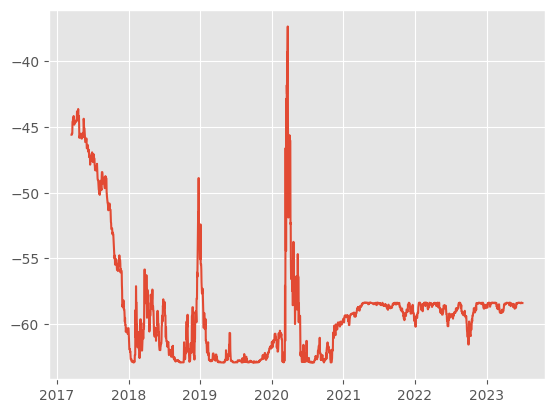

In [ ]:
#Graficamos cuál es la diferencia en promedio de los precios reales y los precios predecidos
dif_error = test_data["Precio Real"] - test_data["Predicciones_LSTM"]
plt.plot(dif_error)
#Mostramos esa diferencia en una tabla
dif_error

In [ ]:
#Colocamos una fórmula para mostrar la validación del algoritmo en base al MSE, MAE, RMSE, MAPE y R2
def evaluacion_metrica(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print("-Resultados de las métricas de evaluación:-")
    print(f"El MSE es : {metrics.mean_squared_error(y_true, y_pred)}")
    print(f"El MAE es : {metrics.mean_absolute_error(y_true, y_pred)}")
    print(f"El RMSE es : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}")
    print(f"El MAPE es : {mean_absolute_percentage_error(y_true, y_pred)}")
    print(f"El R2 es : {metrics.r2_score(y_true, y_pred)}", end = "\n\n")

In [ ]:
#Mostramos los resultados de la valiación de las fórmulas matemáticas
evaluacion_metrica(test_data["Precio Real"], test_data["Predicciones_LSTM"])

-Resultados de las métricas de evaluación:-
El MSE es : 3472.4371388786412
El MAE es : 58.76216183181226
El RMSE es : 58.92738869896274
El MAPE es : 0.21018299261032106
El R2 es : 0.9998308636947597

